### Indice
* [ Introduction](#0)
<br>

* [ Librarys](#1)
    <br>

* [Dataset](#2)
    <br>
    
* [Data_trasnform](#3)
    * [without smote](#3.1)
    * [With Smote](#3.2)
    <br>

* [Study_1:   n_estimators, colsample_bytree](#3)
    <br>
    
    * [Objective Study XGBoost](#1.1)
    * [Best trial]()
    * [Plot_optimization_history](#1.1)
    * [Plot_param_importances]()
    * [plot_parallel_coordinate]()
<br>
<br>
* [Study_2:  eta (learning rate), max_depth, gamma](#3)
    <br>
    
    * [Objective Study XGBoost](#1.1)
    * [Best trial]()
    * [Plot_optimization_history](#1.1)
    * [Plot_param_importances]()
    * [plot_parallel_coordinate]()
<br>
<br>
* [Marge Studys and Save Json](#3)
<br>
<br>

### Introduction <a class="anchor" id="0"></a>

- This is a Notebook to solve the problem of Unbalanced data, in this case our Target(y) which has 2 classes ( 1 and 0).
- Esto es un Notebook para abordar el problema de la data Desbalanceada, en este caso nuestro Target(y) que es cuenta con 2 clases ( 1 y 0).


### Librarys <a class="anchor" id="1"></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from utils import *

#Stacking Models
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

#machine Learning
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import classification_report, recall_score

# remove warnings
import warnings
warnings.filterwarnings('ignore')

### DataSet <a class="anchor" id="2"></a>

In [4]:
df = pd.read_csv('../data/bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data_trasnform <a class="anchor" id="3"></a>

### without smote <a class="anchor" id="3.1"></a>

In [15]:
#Synthetic Minority Oversampling Technique (SMOTE)
X,y = data_trasnform(df, smote=False)

In [18]:
counter = Counter(y)
for k,v in counter.items():
    dist = v/len(y) * 100
    print(f'class={k}, n= {v} ({dist})%')

class=0, n= 36548 (88.73458288821988)%
class=1, n= 4640 (11.265417111780131)%


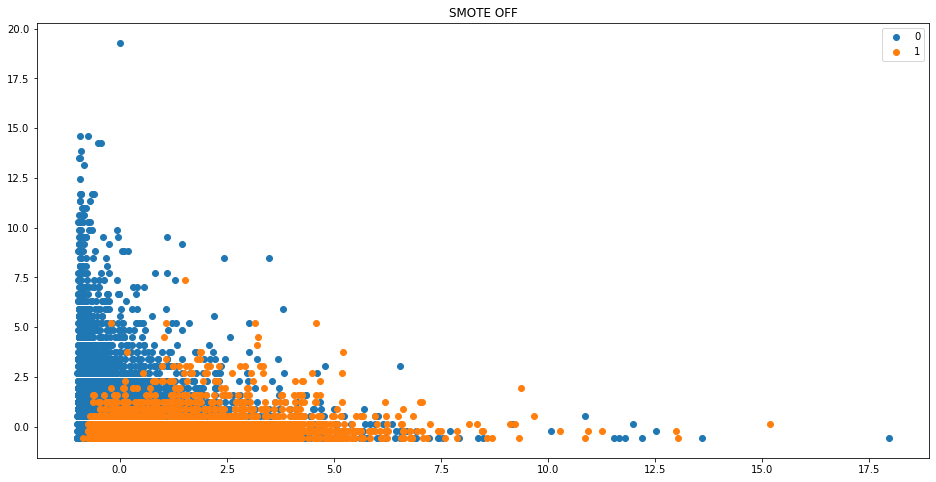

In [20]:
plt.figure(1,figsize=(16,8))
for label,_ in counter.items():
    row = np.where(y == label)[0]
    plt.scatter(X[row,1], X[row,2],label = str(label))
plt.legend()
plt.title('SMOTE OFF')
plt.show()

### with smote <a class="anchor" id="3.2"></a>

In [58]:
#Synthetic Minority Oversampling Technique (SMOTE)
X,y = data_trasnform(df, smote=True)

X.shape: (73096, 57) y.shape: (73096,)


In [59]:
# hyperameters optimized with optuna based on recall / XGboost
hyperameters_xgboost = read_hyperameter_json('../best_params_models/XGBoost_hyperparameter.json')

Hyperameter:   {'n_estimators': 8212, 'colsample_bytree': 0.9294650104948371, 'gamma': 0.0008063171490771039, 'eta': 0.6873165675063626, 'max_depth': 8, 'tree_method': 'gpu_hist'}


In [60]:
# hyperameters optimized with optuna based on recall / RandomForest
hyperameters_randomForest = read_hyperameter_json('../best_params_models/random_forest_params.json')

Hyperameter:   {'n_estimators': 100, 'max_depth': 13, 'max_features': 0.8986731239446424}


In [61]:
#models
model_xgboost = XGBClassifier(**hyperameters_xgboost)
model_randomForest = RandomForestClassifier(**hyperameters_randomForest)

,Metrics,Values
0,balance_accuracy_score,0.778468
1,accuracy_score,0.778469
2,roc_auc_score,0.778468
3,f1_score,0.697735
4,precision_score,0.789791
5,recall_score,0.737782


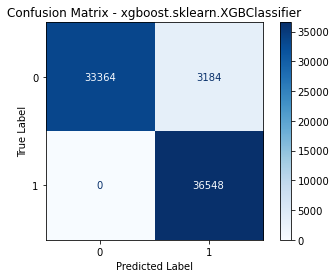

,Metrics,Values
0,balance_accuracy_score,0.794678
1,accuracy_score,0.794678
2,roc_auc_score,0.794678
3,f1_score,0.842491
4,precision_score,0.770098
5,recall_score,0.951585


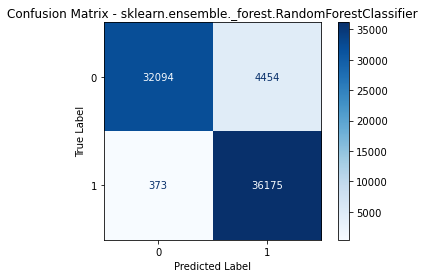

In [62]:
#methos to trains the models with a Straffied K fold
model_xgboost = classifier_SKF(model_xgboost,X,y)
model_randomForest = classifier_SKF(model_randomForest,X,y)

In [64]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    
        ('model_xgboost',model_xgboost),
        ('model_randomForest',model_randomForest)
]


In [65]:
stack_model = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

,Metrics,Values
0,balance_accuracy_score,0.782585
1,accuracy_score,0.782586
2,roc_auc_score,0.782585
3,f1_score,0.684278
4,precision_score,0.806631
5,recall_score,0.708277


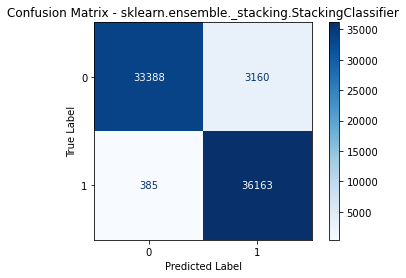

In [66]:
stack_model = classifier_SKF(stack_model,X,y)